### Which month was the best for sales and how much was sold?

### Import necessary packages!

In [1]:
import pandas as pd
import os

### Merge all 12 files into 1

In [2]:


files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index = False)

### Clean up the data

In [3]:
all_data = pd.read_csv('./all_data.csv')

all_data['Month'] = all_data['Order Date'].str[0:2]

all_data = all_data.drop(1, axis = 0)

all_data = all_data.reset_index()

all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [4]:
#pd.set_option('display.max_rows', 500)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].apply(pd.to_numeric, errors='coerce')
all_data['Price Each'] = all_data['Price Each'].apply(pd.to_numeric, errors='coerce')

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
355,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,519,Order ID,Product,NaN,NaN,Order Date,Purchase Address,Or
734,735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1148,1149,Order ID,Product,NaN,NaN,Order Date,Purchase Address,Or
1154,1155,Order ID,Product,NaN,NaN,Order Date,Purchase Address,Or


In [6]:
all_data['Price Each'].to_csv('PriceEachCheck.csv')

/Users/nenadsavic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [7]:
all_data = all_data.dropna()
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [8]:
all_data['Month'] = all_data['Month'].astype('int32')

In [9]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sales column

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [11]:
all_data.insert(6, 'Sales', all_data['Quantity Ordered'] * all_data['Price Each'])
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,23.90,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,99.99,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,600.00,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,11.99,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,11.99,"333 8th St, Los Angeles, CA 90001",4


In [12]:
all_data['Sales'].sum()

34492035.97

In [13]:
list_of_sales_by_month = []
for i in range(1,13):
    suma = all_data['Sales'].where(all_data['Month'] == i).sum()
    list_of_sales_by_month.append(suma)
maximum = max(list_of_sales_by_month)
print(list_of_sales_by_month)
print('Month: ', list_of_sales_by_month.index(maximum) +1, '\t', 'Amount: ', maximum)

[1822256.7299999997, 2202022.42, 2807100.38, 3390670.2399999993, 3152606.7499999995, 2577802.2600000002, 2647775.7599999993, 2244467.88, 2097560.13, 3736726.88, 3199603.1999999997, 4613443.340000001]
Month:  12 	 Amount:  4613443.340000001


In [14]:
all_data['Sales'].where(all_data['Month'] == 1).sum()
all_data['Sales'].where(all_data['Month'] == 2).sum()

2202022.42

In [15]:
for i in range(1,3):
    suma = 0
    suma += all_data['Sales'].where(all_data['Month'] == i).sum()
    print(suma)

1822256.7299999997
2202022.42


In [16]:
all_data.groupby('Month').sum()['Sales'].sort_values()

Month
1     1.822257e+06
9     2.097560e+06
2     2.202022e+06
8     2.244468e+06
6     2.577802e+06
7     2.647776e+06
3     2.807100e+06
5     3.152607e+06
11    3.199603e+06
4     3.390670e+06
10    3.736727e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [17]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

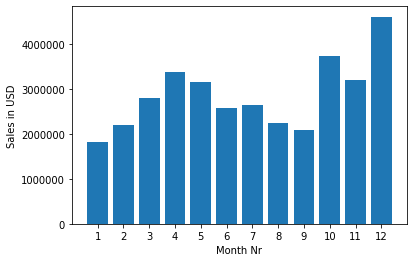

In [18]:
months = range(1,13)
results = all_data.groupby('Month').sum()
plt.xticks(months)
plt.xlabel('Month Nr')
plt.ylabel('Sales in USD')
plt.bar(months, results['Sales'])

### What city had a highest number of sales?

In [19]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,23.90,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,99.99,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,600.00,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,11.99,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,11.99,"333 8th St, Los Angeles, CA 90001",4


In [20]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2][0:3]

In [21]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

In [22]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,23.90,"917 1st St, Dallas, TX 75001",4,Dallas TX
1,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,99.99,"682 Chestnut St, Boston, MA 02215",4,Boston MA
2,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,600.00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
3,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,11.99,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,11.99,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


In [23]:
all_data.groupby('City').sum()['Sales'].sort_values()

City
 Portland  ME         4.497583e+05
 Austin  TX           1.819582e+06
 Portland  OR         1.870732e+06
 Seattle  WA          2.747755e+06
 Dallas  TX           2.767975e+06
 Atlanta  GA          2.795499e+06
 Boston  MA           3.661642e+06
 New York City  NY    4.664317e+06
 Los Angeles  CA      5.452571e+06
 San Francisco  CA    8.262204e+06
Name: Sales, dtype: float64

In [24]:
all_data['City'].unique()

array([' Dallas  TX', ' Boston  MA', ' Los Angeles  CA',
       ' San Francisco  CA', ' Seattle  WA', ' Atlanta  GA',
       ' New York City  NY', ' Portland  OR', ' Austin  TX',
       ' Portland  ME'], dtype=object)

Text(0, 0.5, 'Sales in USD')

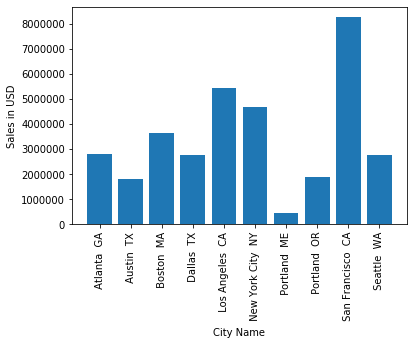

In [25]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

results = all_data.groupby('City').sum()
plt.bar(cities, results['Sales'])
plt.xticks(cities)
plt.xticks(rotation=90)
plt.xlabel('City Name')
plt.ylabel('Sales in USD')


### What time should we display the ad to maximize likelihood of customer's buying product?

In [26]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Sales,Purchase Address,Month,City
0,0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,23.90,"917 1st St, Dallas, TX 75001",4,Dallas TX
1,2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,99.99,"682 Chestnut St, Boston, MA 02215",4,Boston MA
2,3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,600.00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
3,4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,11.99,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,11.99,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


In [27]:
all_data.insert(6,'Hour', all_data['Order Date'].dt.hour)

In [28]:
all_data.insert(7,'Minute', all_data['Order Date'].dt.minute)
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Hour,Minute,Sales,Purchase Address,Month,City
0,0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,8,46,23.90,"917 1st St, Dallas, TX 75001",4,Dallas TX
1,2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,22,30,99.99,"682 Chestnut St, Boston, MA 02215",4,Boston MA
2,3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,14,38,600.00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
3,4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,14,38,11.99,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,9,27,11.99,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


Text(0, 0.5, 'Number of Orders')

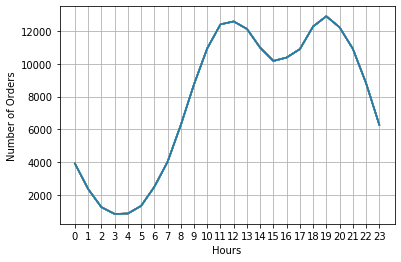

In [29]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')


### What products are more often sold together?

In [31]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/Users/nenadsavic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df['Ones'] = 1
df.head()

,Order ID,Grouped,Ones
2,176560,"Google Phone,Wired Headphones",1
17,176574,"Google Phone,USB-C Charging Cable",1
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea...",1
31,176586,"AAA Batteries (4-pack),Google Phone",1
118,176672,"Lightning Charging Cable,USB-C Charging Cable",1


In [36]:
df.groupby('Grouped').sum()['Ones'].sort_values()

Grouped
Google Phone,USB-C Charging Cable,USB-C Charging Cable      1
LG Washing Machine,27in 4K Gaming Monitor                   1
LG Washing Machine,20in Monitor                             1
LG Dryer,Wired Headphones                                   1
LG Dryer,Vareebadd Phone                                    1
                                                         ... 
Google Phone,Wired Headphones                             303
Vareebadd Phone,USB-C Charging Cable                      312
iPhone,Wired Headphones                                   361
Google Phone,USB-C Charging Cable                         856
iPhone,Lightning Charging Cable                           882
Name: Ones, Length: 366, dtype: int64

### What product sold the most and why?

In [37]:
all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Hour,Minute,Sales,Purchase Address,Month,City
0,0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,8,46,23.90,"917 1st St, Dallas, TX 75001",4,Dallas TX
1,2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,22,30,99.99,"682 Chestnut St, Boston, MA 02215",4,Boston MA
2,3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,14,38,600.00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
3,4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,14,38,11.99,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,9,27,11.99,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


In [39]:
all_data.groupby('Product').sum()['Quantity Ordered'].sort_values()

Product
LG Dryer                        646.0
LG Washing Machine              666.0
Vareebadd Phone                2068.0
20in Monitor                   4129.0
ThinkPad Laptop                4130.0
Macbook Pro Laptop             4728.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
34in Ultrawide Monitor         6199.0
27in 4K Gaming Monitor         6244.0
iPhone                         6849.0
27in FHD Monitor               7550.0
Bose SoundSport Headphones    13457.0
Apple Airpods Headphones      15661.0
Wired Headphones              20557.0
Lightning Charging Cable      23217.0
USB-C Charging Cable          23975.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Name: Quantity Ordered, dtype: float64

Text(0, 0.5, 'Quantity sold')

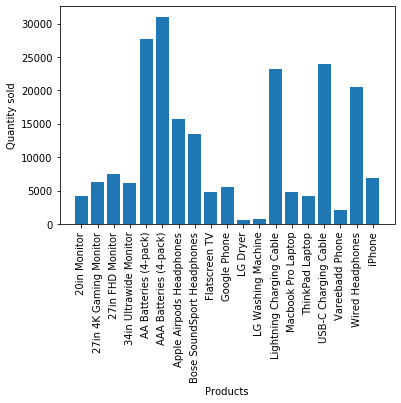

In [42]:
products = [product for product, df in all_data.groupby('Product')]
results = all_data.groupby('Product').sum()
plt.bar(products, results['Quantity Ordered'])
plt.xticks(products)
plt.xticks(rotation=90)
plt.xlabel('Products')
plt.ylabel('Quantity sold')


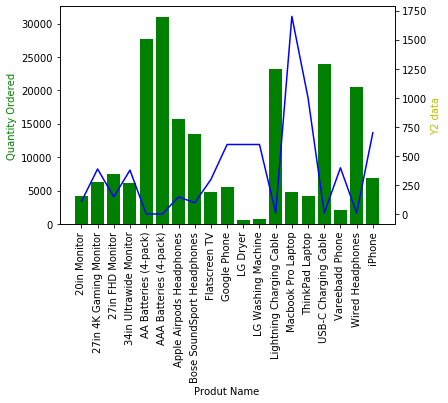

In [60]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, results['Quantity Ordered'], color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Produt Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Y2 data', color='y')
ax1.set_xticklabels(products,rotation=90)

plt.show()